,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

None

k=1: Accuracy=0.8947
k=2: Accuracy=0.8947
k=3: Accuracy=0.8947
k=4: Accuracy=0.8860
k=5: Accuracy=0.9035
k=6: Accuracy=0.9035
k=7: Accuracy=0.9035
k=8: Accuracy=0.9211
k=9: Accuracy=0.9211
k=10: Accuracy=0.9298
k=11: Accuracy=0.9035
k=12: Accuracy=0.9298
k=13: Accuracy=0.9211
k=14: Accuracy=0.9298
k=15: Accuracy=0.9211


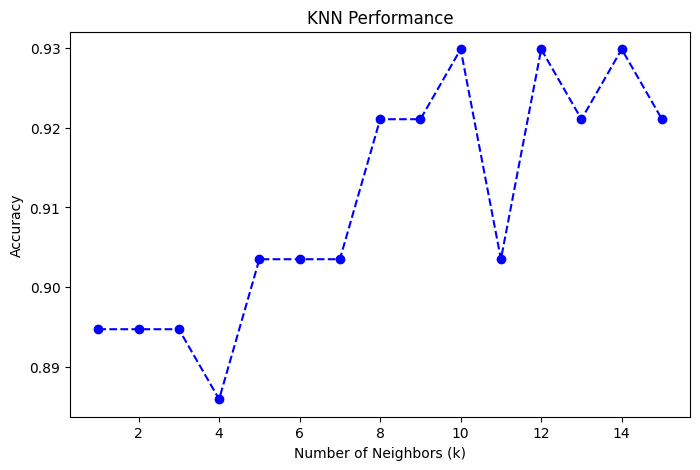

Best k: 10 with Accuracy: 0.9298

Model Performance Metrics (Best k=10)
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        71
           1       0.93      0.88      0.90        43

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114


Confusion Matrix:
 [[68  3]
 [ 5 38]]


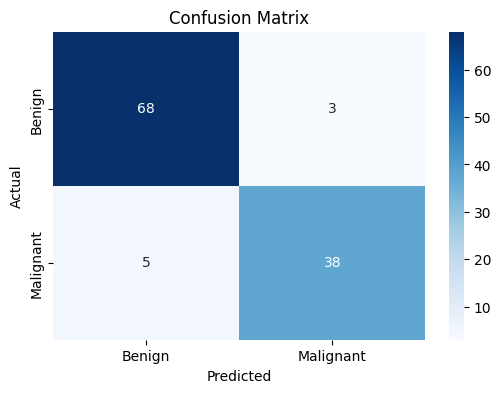

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('breastcancer1.csv')

# Display basic info
display(df.head())
display(df.info())

# Convert 'Diagnosis' column to numeric values (M -> 1, B -> 0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Select features and target variable
X = df[['texture_mean', 'radius_mean']]
y = df['diagnosis']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Function to train and evaluate KNN for different values of k
def evaluate_knn(k_values):
    accuracies = []
    best_k = 0
    best_accuracy = 0
    best_predictions = None
    
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        
        print(f'k={k}: Accuracy={accuracy:.4f}')
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = k
            best_predictions = y_pred
    
    # Plot the accuracy vs k values
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, accuracies, marker='o', linestyle='dashed', color='b')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Accuracy')
    plt.title('KNN Performance')
    plt.show()
    
    print(f'Best k: {best_k} with Accuracy: {best_accuracy:.4f}')
    
    # Model Performance Metrics
    print("\nModel Performance Metrics (Best k={})".format(best_k))
    print(classification_report(y_test, best_predictions))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, best_predictions)
    print("\nConfusion Matrix:\n", conf_matrix)

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
                xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

# Evaluate KNN for k values from 1 to 15
evaluate_knn(range(1, 16))
